In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [108]:
def l2dist(a, b):
    return math.sqrt(((a - b)**2).sum())


def getCentroid(cluster):
    return cluster.mean(axis=0)


def getMedoid(cluster):
    centroid = getCentroid(cluster)
    min = 100
    medoid = None
    for point in cluster:
        dist = l2dist(point, centroid)
        if dist < min:
            min = dist
            medoid = point
    return medoid


def getRadius(cluster, centroid):
    return math.sqrt(((cluster - centroid)**2).sum(axis=1).mean())


def getDiameter(cluster):
    N, D = cluster.shape
    operand1 = np.tile(cluster, reps=N).reshape(N, N, D)
    operand2 = np.expand_dims(cluster, axis=0)
    return math.sqrt(((operand1 - operand2)**2).sum(axis=2).mean())


def getSingleLink(cluster1, cluster2):
    N1, D = cluster1.shape
    N2, D = cluster2.shape
    operand1 = np.tile(cluster1, reps=N2).reshape(N1, N2, D)
    operand2 = np.expand_dims(cluster2, axis=0)
    return math.sqrt(((operand1 - operand2) ** 2).sum(axis=2).min())


def getCompleteLink(cluster1, cluster2):
    N1, D = cluster1.shape
    N2, D = cluster2.shape
    operand1 = np.tile(cluster1, reps=N2).reshape(N1, N2, D)
    operand2 = np.expand_dims(cluster2, axis=0)
    return math.sqrt(((operand1 - operand2) ** 2).sum(axis=2).max())


def getAverageLink(cluster1, cluster2):
    N1, D = cluster1.shape
    N2, D = cluster2.shape
    operand1 = np.tile(cluster1, reps=N2).reshape(N1, N2, D)
    operand2 = np.expand_dims(cluster2, axis=0)
    return math.sqrt(((operand1 - operand2) ** 2).sum(axis=2).mean())


def getCentroidLink(cluster1, cluster2):
    return l2dist(getCentroid(cluster1), getCentroid(cluster2))

In [109]:
dataset1 = np.concatenate([
    np.random.multivariate_normal([5, 5], np.eye(2)*.3, 1000),
    np.random.multivariate_normal([5, 1], np.eye(2)*.3, 1000),
], axis=0)

dataset2 = np.concatenate([
    np.random.multivariate_normal([-5, 5], np.eye(2)*.3, 1000),
    np.random.multivariate_normal([-5, 1], np.eye(2)*.3, 1000),
], axis=0)

centroid1 = getCentroid(dataset1)
radius1 = getRadius(dataset1, centroid1)
diameter1 = getDiameter(dataset1)
medoid1 = getMedoid(dataset1)

centroid2 = getCentroid(dataset2)
radius2 = getRadius(dataset2, centroid2)
diameter2 = getDiameter(dataset2)
medoid2 = getMedoid(dataset2)

singleLink = getSingleLink(dataset1, dataset2)
completeLink = getCompleteLink(dataset1, dataset2)
averageLink = getAverageLink(dataset1, dataset2)
centroidLink = getCentroidLink(dataset1, dataset2)

print(f'centroid1: {centroid1}, medoid1: {medoid1}')
print(f'radius1: {radius1}, diameter1: {diameter1}')

print(f'centroid2: {centroid2}, medoid2: {medoid2}')
print(f'radius2: {radius2}, diameter2: {diameter2}')

print(f'singleLink: {singleLink}, completeLink: {completeLink}')
print(
    f'averageDistance: {averageLink}, centroidDistance: {centroidLink}')

centroid1: [4.98512387 2.99706662], medoid1: [4.7524724  3.17292078]
radius1: 2.161266398090808, diameter1: 3.05649225208127
centroid2: [-5.00312245  3.001347  ], medoid2: [-5.23003921  3.20229621]
radius2: 2.119473673372424, diameter2: 2.997388413976006
singleLink: 6.377891041098065, completeLink: 14.62501080750367
averageDistance: 10.436873283759326, centroidDistance: 9.988247235907524


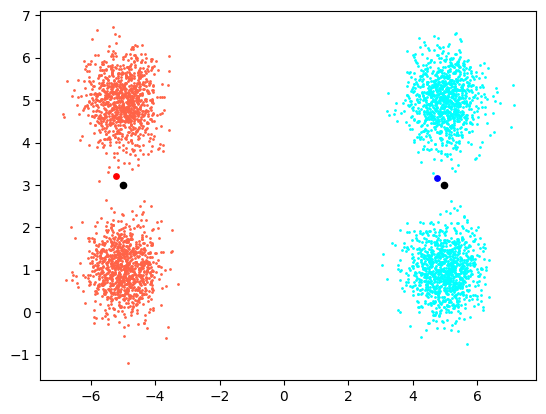

In [110]:
plt.scatter(dataset1[:, 0], dataset1[:, 1], s=1, c="cyan")
plt.scatter(centroid1[0], centroid1[1], s=20, c="black")
plt.scatter(medoid1[0], medoid1[1], s=15, c="blue")
plt.scatter(dataset2[:, 0], dataset2[:, 1], s=1, c="tomato")
plt.scatter(centroid2[0], centroid2[1], s=20, c="black")
plt.scatter(medoid2[0], medoid2[1], s=15, c="red")
plt.show()